# Obtención y preparación de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/Real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(['No'], axis = 1)
df = df.drop(['X1 transaction date'], axis = 1)

df.rename(columns = {'X2 house age': 'edad'}, inplace = True)
df.rename(columns = {'X3 distance to the nearest MRT station': 'distancia estacion'}, inplace = True)
df.rename(columns = {'X4 number of convenience stores': 'tiendas cercanas'}, inplace = True)
df.rename(columns = {'X5 latitude': 'latitud'}, inplace = True)
df.rename(columns = {'X6 longitude': 'longitud'}, inplace = True)
df.rename(columns = {'Y house price of unit area': 'precio'}, inplace = True)

df.head()

,edad,distancia estacion,tiendas cercanas,latitud,longitud,precio
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
X = df['distancia estacion'].values.reshape(-1,1)
y = df['precio'].values.reshape(-1,1)

In [5]:
print(X.shape)

(414, 1)


# Importando train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# los parámetros son los conjuntos que va a aseparar (x,y), el % de los datos que será la muestra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [8]:
print(X_train.shape)
print(X_test.shape)

(331, 1)
(83, 1)


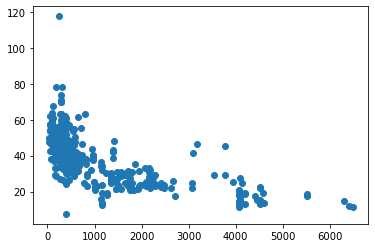

In [9]:
fig = plt.figure()
plt.scatter(X, y)
plt.show()

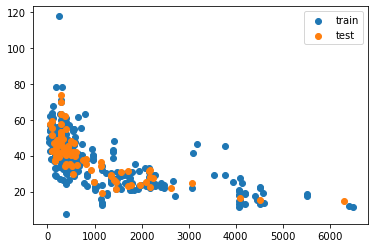

In [12]:
fig = plt.figure()
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.show()

### Ejemplos Subplot
https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

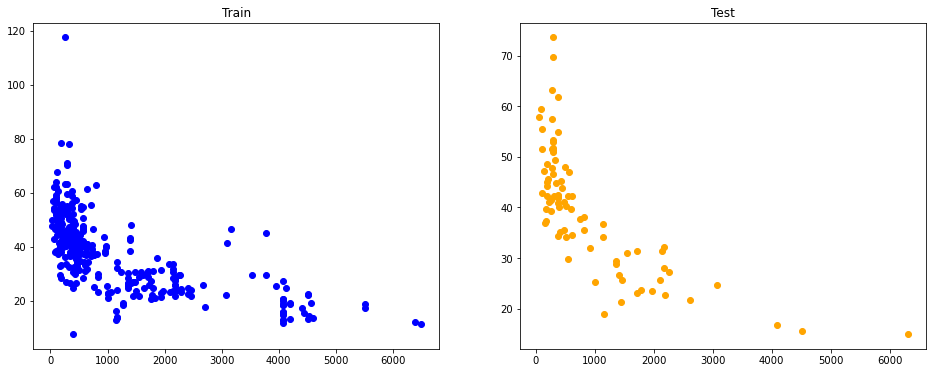

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1.scatter(X_train, y_train, c='blue')
ax1.set_title('Train')
ax2.scatter(X_test, y_test, c='orange')
ax2.set_title('Test');

# Visualicemos lo anterior usando una gráfica interactiva.

In [14]:
def split(size = 0.20, state = 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = state)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
    ax1.scatter(X_train, y_train, c='blue')
    ax1.set_title('Train')
    ax2.scatter(X_test, y_test, c='orange')
    ax2.set_title('Test');

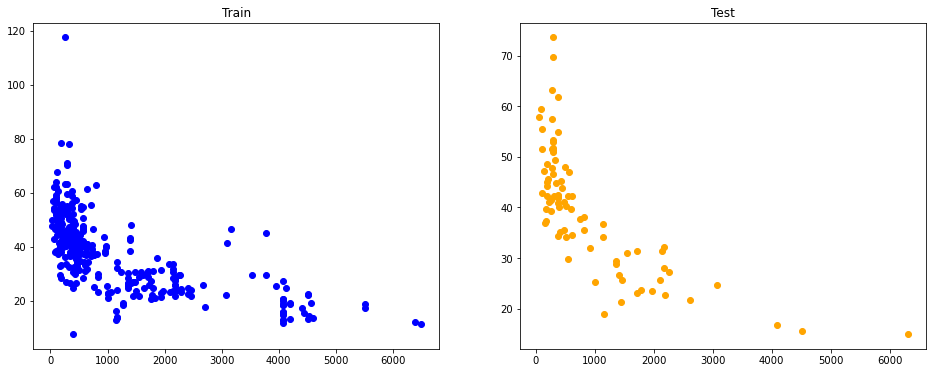

In [15]:
split()

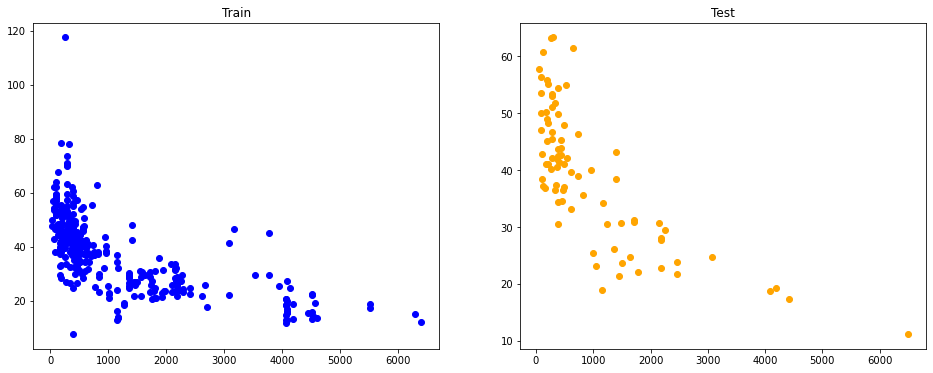

In [16]:
split(state = 20)

In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [18]:
interact(split, size = (0.1, 0.5), state = (1, 100));

interactive(children=(FloatSlider(value=0.2, description='size', max=0.5, min=0.1), IntSlider(value=100, descr…

# Probando nuestro modelo de regresión con el split de datos.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

### Construyendo el modelo.

In [25]:
model = LinearRegression().fit(X_train, y_train)

x_plot = np.linspace(0,7000).reshape(-1, 1)
y_plot = model.predict(x_plot)

### Probando el modelo con datos conocidos.

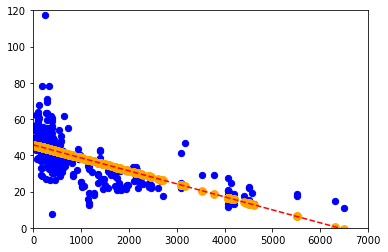

0.4621820771756455

In [26]:
# Usando el modelo para realizar predicciones con el conjunto de entrenamiento.
y_train_prediccion = model.predict(X_train)

fig = plt.figure()
plt.axis([0, 7000, 0, 120])
plt.scatter(X_train, y_train, c = 'blue', s = 40)
plt.scatter(X_train, y_train_prediccion, c = 'orange', s = 60)
plt.plot(x_plot, y_plot, "r--")
plt.show()

r2_score(y_train, y_train_prediccion)

### Probando el modelo con datos desconocidos.

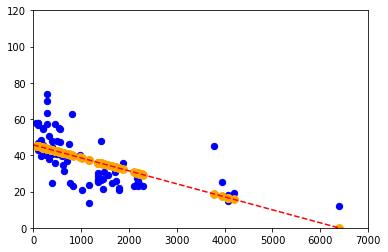

0.42031198235159317

In [27]:
# Usando el modelo para realizar predicciones con el conjunto de entrenamiento.
y_test_prediccion = model.predict(X_test)

fig = plt.figure()
plt.axis([0, 7000, 0, 120])
plt.scatter(X_test, y_test, c = 'blue', s = 40)
plt.scatter(X_test, y_test_prediccion, c = 'orange', s = 60)
plt.plot(x_plot, y_plot, "r--")
plt.show()

r2_score(y_test, y_test_prediccion)

# Validación cruzada.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

In [28]:
from sklearn.model_selection import KFold

In [29]:
kfold = KFold(4, shuffle = False)

In [30]:
for train, test in kfold.split(X):
    print(train)
    print()
    print(test)
    print()

[104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 35

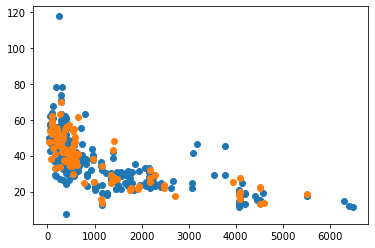

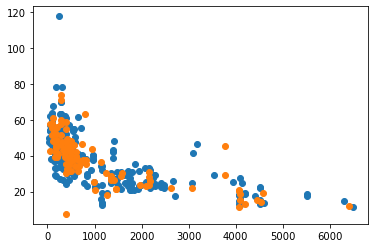

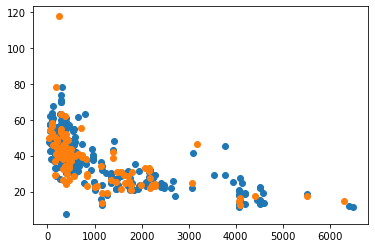

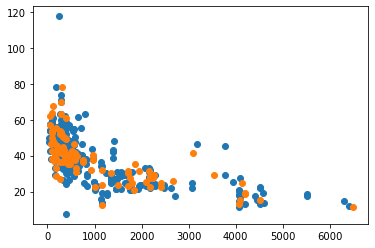

In [31]:
for train, test in kfold.split(X):
    
    # Datos entrenamiento.
    X_train = X[train]
    y_train = y[train]
    
    # Datos prueba.
    X_test = X[test]
    y_test = y[test]
    
    # Grafica de los datos.
    fig = plt.figure()
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.show()
    
    print()

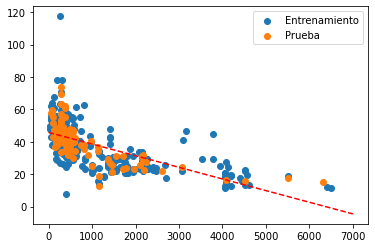

0.44629632735642477
0.47267956987440785

-------------------------------------------------------------



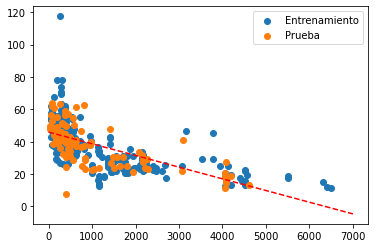

0.45115469408610065
0.462133458999351

-------------------------------------------------------------



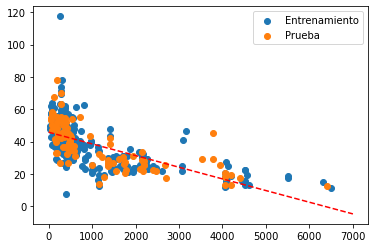

0.4392215205978637
0.4898973359884313

-------------------------------------------------------------



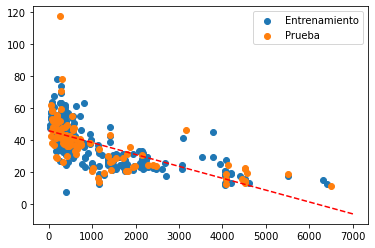

0.48080543726306035
0.3961278975372525

-------------------------------------------------------------

0.45436949482586236
0.4552095655998607


In [36]:
# automatizar el proceso de k fold
divisiones = 4

kfold = KFold(divisiones, shuffle = True, random_state= 100)

r2_train_avg = 0
r2_test_avg = 0

for train, test in kfold.split(X):
    
    # Datos entrenamiento.
    X_train = X[train]
    y_train = y[train]
    
    # Datos prueba.
    X_test = X[test]
    y_test = y[test]
    
    # Construcción del modelo con los datos de entrenamiento.
    model = LinearRegression().fit(X_train, y_train)
    
    x_plot = np.linspace(0,7000).reshape(-1, 1)
    y_plot = model.predict(x_plot)

    y_train_prediccion = model.predict(X_train)
    y_test_prediccion = model.predict(X_test)
    
    fig = plt.figure()
    plt.scatter(X_train, y_train, label = 'Entrenamiento')
    plt.scatter(X_test, y_test, label = 'Prueba')
    plt.legend()
    plt.plot(x_plot, y_plot, "r--")
    plt.show()

    r2_train = r2_score(y_train, y_train_prediccion)
    r2_test = r2_score(y_test, y_test_prediccion)
    
    r2_train_avg = r2_train_avg + r2_train
    r2_test_avg = r2_test_avg + r2_test
    
    print(r2_train)
    print(r2_test)
    print()
    print("-------------------------------------------------------------")
    print()
    
print(r2_train_avg / divisiones)
print(r2_test_avg / divisiones)

0



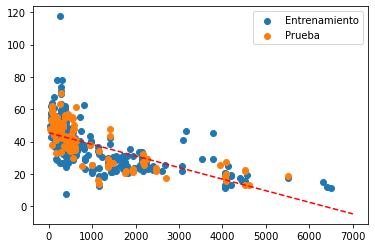

0.4298692180408924
0.5259728391394239

-------------------------------------------------------------



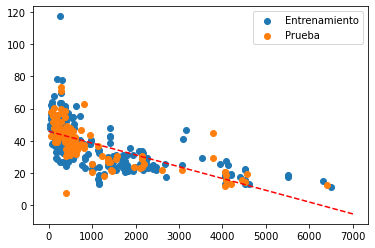

0.44389030037674815
0.4837457512506588

-------------------------------------------------------------



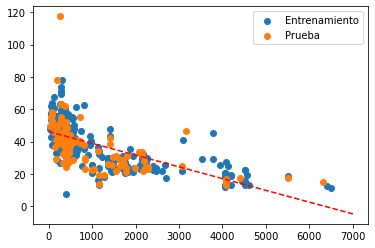

0.5043946828783384
0.3281114549254609

-------------------------------------------------------------



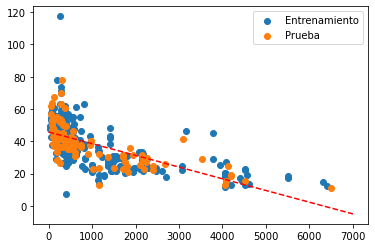

0.44131670527070377
0.497433519734532

-------------------------------------------------------------

inf
inf
1



<ipython-input-38-98eda5043dc1>:49: RuntimeWarning: divide by zero encountered in double_scalars
  print(r2_train_avg / (repeticiones*divisiones))
<ipython-input-38-98eda5043dc1>:50: RuntimeWarning: divide by zero encountered in double_scalars
  print(r2_test_avg / (repeticiones*divisiones))


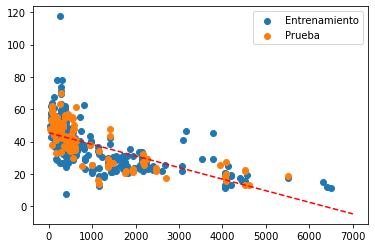

0.4298692180408924
0.5259728391394239

-------------------------------------------------------------



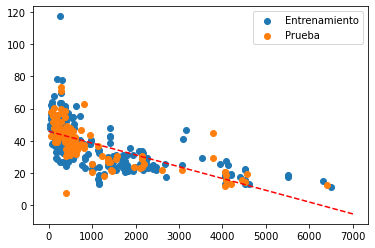

0.44389030037674815
0.4837457512506588

-------------------------------------------------------------



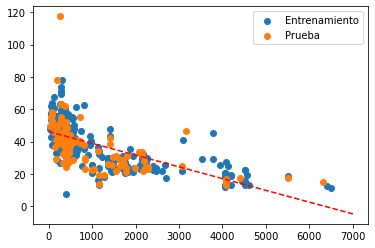

0.5043946828783384
0.3281114549254609

-------------------------------------------------------------



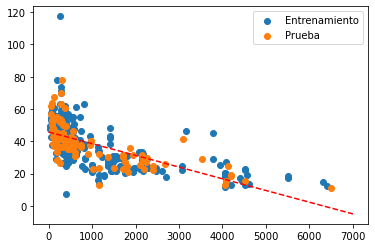

0.44131670527070377
0.497433519734532

-------------------------------------------------------------

0.9097354532833413
0.9176317825250377
2



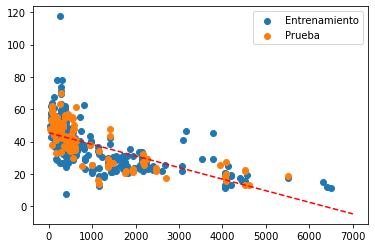

0.4298692180408924
0.5259728391394239

-------------------------------------------------------------



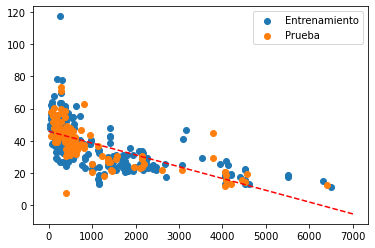

0.44389030037674815
0.4837457512506588

-------------------------------------------------------------



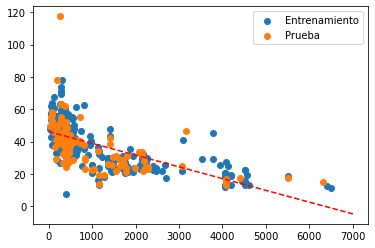

0.5043946828783384
0.3281114549254609

-------------------------------------------------------------



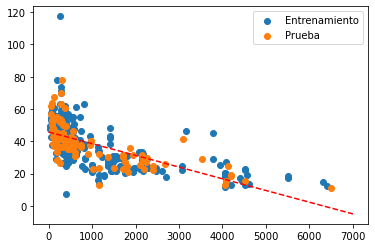

0.44131670527070377
0.497433519734532

-------------------------------------------------------------

0.6823015899625059
0.6882238368937783
3



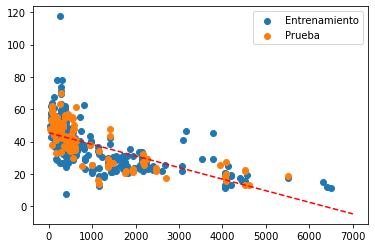

0.4298692180408924
0.5259728391394239

-------------------------------------------------------------



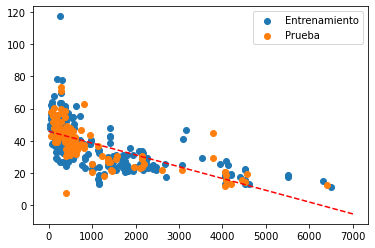

0.44389030037674815
0.4837457512506588

-------------------------------------------------------------



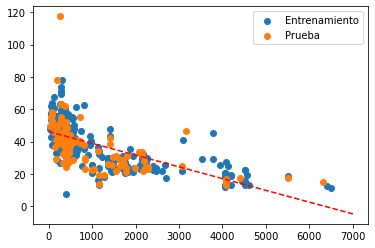

0.5043946828783384
0.3281114549254609

-------------------------------------------------------------



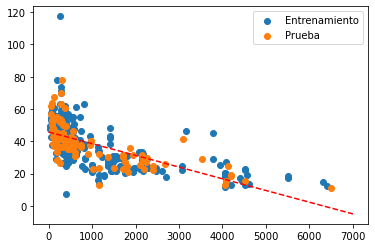

0.44131670527070377
0.497433519734532

-------------------------------------------------------------

0.6064903021888941
0.6117545216833585


In [38]:
# hará más repeticiones. Es una forma de asegurarte que el desempeño del modelo sea bueno y que no predijo bien solo para
# el conjunto de datos que seleccionaste
divisiones = 4

kfold = KFold(divisiones, shuffle = False)

r2_train_avg = 0
r2_test_avg = 0

for repeticiones in range (4):
    print(repeticiones)
    print()
    for train, test in kfold.split(X):

        # Datos entrenamiento.
        X_train = X[train]
        y_train = y[train]

        # Datos prueba.
        X_test = X[test]
        y_test = y[test]

        # Construcción del modelo con los datos de entrenamiento.
        model = LinearRegression().fit(X_train, y_train)

        x_plot = np.linspace(0,7000).reshape(-1, 1)
        y_plot = model.predict(x_plot)

        y_train_prediccion = model.predict(X_train)
        y_test_prediccion = model.predict(X_test)

        fig = plt.figure()
        plt.scatter(X_train, y_train, label = 'Entrenamiento')
        plt.scatter(X_test, y_test, label = 'Prueba')
        plt.legend()
        plt.plot(x_plot, y_plot, "r--")
        plt.show()

        r2_train = r2_score(y_train, y_train_prediccion)
        r2_test = r2_score(y_test, y_test_prediccion)

        r2_train_avg = r2_train_avg + r2_train
        r2_test_avg = r2_test_avg + r2_test

        print(r2_train)
        print(r2_test)
        print()
        print("-------------------------------------------------------------")
        print()

    print(r2_train_avg / (repeticiones*divisiones)) 
    print(r2_test_avg / (repeticiones*divisiones))